# Modèles et données
---

<div style="text-align: center;">
    <div style="display: inline-block; position: relative; width: 350px;">
        <img src="../img/_4c492367-b76e-4fc2-b295-5a1cd0fad49b.jpeg" alt="Dessin" style="width: 100%;"/>
        <p style="text-align: center; margin-top: 5px;">
            <span style="font-style: italic; font-size: 16px;"> Fit Global</span><br/>
            <span style="font-style: italic; font-size: 12px;">Image générée par DALL·E 3, mars 2024 </span>
        </p>
    </div>
</div>


---
## Mise en contexte

### Principe fondamental 

Un principe fondamental de la science empirique consiste à apposer un modèle $M$ sur un ensemble de données $D$. Classiquement, l'ensemble de données $D$ consiste en un ensemble de données expérimentales, c'est-à-dire des valeurs mesurées, et le modèle $M$ est une fonction mathématique d'une ou plusieurs variables, comprenant un ou plusieurs paramètres. 

L'idée est de déterminer la valeur numérique de chaque paramètres du modèle $M$ qui fait en sorte que celui-ci correspond le mieux à l'ensemble de données $D$. Plus précisement, il s'agit d'appliquer une méthode d'optimisation qui minimise une certaine fonction de coût qui représente les différences entre les valeurs prédites par le modèle et les valeurs réelles des données (généralement appelées les résidus). Une méthode courante est la méthode des moindres carrés. Les paramètres optimaux seront ceux qui minimisent la somme des carrés des résidus.      

Aussi, des méthodes statistiques complexes, impliquant la matrice de covariance, permettent de calculer une incertitude associée à ces paramètres. Il est également possible de calculer des mesures de performance tel que le coefficient de détermination $R^2$. Plus $R^2$ est proche de 1, meilleure est l'adéquation du modèle aux données.

Ayant alors établit ce modèle $M$, celui-ci peut être utilisé pour effectuer des prédictions, tant pour les phénomènes naturels que pour le contrôle technologique. C'est exactement le même principe qui est appliqué dans les algorithmes d'apprentissage machine à la base de l'intelligence artificielle. 

###  Librairie scipy et la méthode curve_fit

Pour n'importe quel ensemble de donnée de ce notebook, la méthode est la suivante:

1. **Définition du modèle** :
   Nous définissons une fonction appelée `modele`. Cette fonction prend $n$ variables ($x$, $y$, $t$, etc.) et $p$ paramètres ($a$, $b$, $alpha$, etc). 

2. **Générer des données factices** :
   En principe l'ensemble de données $D$ est importé depuis un fichier. Dans ce notebook, l'ensemble des données est simulé. 

3. **Ajustement de courbe** :
   Nous utilisons la fonction `curve_fit` de la bibliothèque Scipy pour ajuster notre modèle aux données. Cette fonction retourne deux valeurs : `popt`, qui contient les paramètres optimaux du modèle, et `pcov`, qui est la matrice de covariance contenant des informations sur les incertitudes sur ces paramètres.

4. **Paramètres optimaux** :
   Nous extrayons les paramètres optimaux `a_fit` et `b_fit` à partir de `popt`. Ces valeurs représentent les paramètres optimaux du modèle qui ont été trouvés par l'ajustement du modèle aux données.

5. **Calcul des incertitudes sur les paramètres optimaux** :
   Pour le modèle linéaire, nous pouvons calculer les incertitudes sur les paramètres optimaux à partir de la matrice de covariance `pcov`. Pour ce faire, nous extrayons les écarts types des paramètres de la diagonale de la matrice de covariance en utilisant la fonction `np.sqrt(np.diag(pcov))`. Concernant les modèles non-linéaires, le calcul des incertitudes est laissé à la discrétion de l'utilisateur...

6. **Prédiction du modèle** :
   Nous utilisons les paramètres ajustés `a_fit` et `b_fit` pour prédire les valeurs de `y` en utilisant notre modèle linéaire. Les valeurs prédites sont stockées dans `y_pred`.


---
## Exemple 1: Modèle linéaire

Un grand nombre de phénomène sont représentés par un modèle linéaire simple. Ce modèle est une droite de type $f(x) = ax + b$. La variable indépendante est $x$ et la variable dépendante est $y=f(x)$. L'ensemble des données est donc un tableau $y$ en fonction de $x$. Les paramètres $a$ et $b$ sont respectivement la pente et l'ordonnée à l'origine.    



Paramètres optimaux:
 a = 1.8544719082884815,
 b = 3.860923326128759
Incertitude sur les paramètres optimaux:
 delta_a = 0.05284616043228467,
 delta_b = 0.3020257094910434
Coefficient de détermination:
 R² = 0.9624836188502044


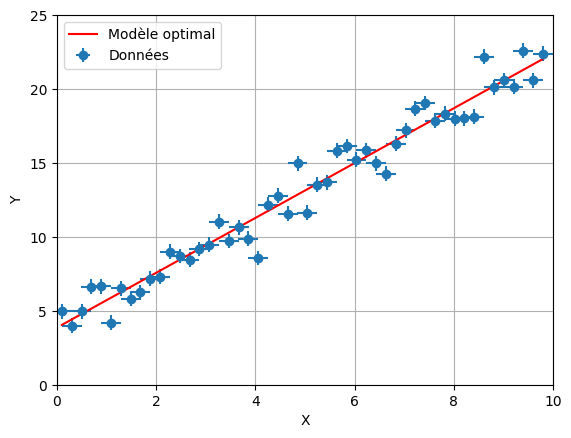

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------------------------------------------------------------------
# Définition du modèle: 
def modele_lineaire(x, a, b):
    """
    Modèle : 
        f(x) = ax + b
    variable indépendante: 
        x
    variable dépendante: 
        y = f(x) 
    paramètres: 
        a, b 
    """
    return a * x + b

# -------------------------------------------------------------------------------------------
# Génération d'un ensemble de données factices (les valeurs numérique peuvent être changé pour tester la méthode. Par exemple, la variable scale permet de rendre les données de plus en plus bruitées.)
np.random.seed(0)
x_data = np.linspace(.1, 9.8, 50)
y_data = 2 * x_data + 3 + np.random.normal(scale=1, size=x_data.size)  # Ajout de bruit gaussien
incertitude_x = 0.2  # Incertitude sur x_data
incertitude_y = 0.5  # Incertitude sur y_data

# -------------------------------------------------------------------------------------------
# Ajustement du modèle 
popt, pcov = curve_fit(modele_lineaire, x_data, y_data)

# Paramètres optimaux obtenus:
a_fit, b_fit = popt

# -------------------------------------------------------------------------------------------
# Calcul des incertitudes sur les paramètres optimaux
a_uncertainty, b_uncertainty = np.sqrt(np.diag(pcov))

# -------------------------------------------------------------------------------------------
# Calcul du coefficient de détermination
y_pred = modele_lineaire(x_data, a_fit, b_fit) # Prédiction du modèle
y_mean = np.mean(y_data)
r_squared = 1 - np.sum((y_data - y_pred)**2) / np.sum((y_data - y_mean)**2)

# -------------------------------------------------------------------------------------------
# Affichage des résultats
print(f"Paramètres optimaux:\n a = {a_fit},\n b = {b_fit}")
print(f"Incertitude sur les paramètres optimaux:\n delta_a = {a_uncertainty},\n delta_b = {b_uncertainty}")
print(f"Coefficient de détermination:\n R² = {r_squared}")

# Visualisation des données et du modèle
plt.errorbar(x_data, y_data, xerr=incertitude_x, yerr=incertitude_y, fmt='o', label='Données')
plt.plot(x_data, modele_lineaire(x_data, a_fit, b_fit), color='red', label='Modèle optimal')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 10)  # Remplacez min_x_value et max_x_value par vos valeurs minimale et maximale pour l'axe X
plt.ylim(0, 25) 
plt.legend()
plt.grid(True)
plt.show()

---
## Exemple 2: Modèle polynomial

Le modèle linéaire est un polynôme d'ordre 1. La même méthode s'applique pour un polynôme d'ordre quelconque. Nous considérons ici un polynôme d'ordre 2 : $f(x) = ax^2 + bx + c$.    


Paramètres optimaux:
 a = 2.5483337703871904,
 b = -15.677253298113103,
 c = 37.37957029932788
Coefficient de détermination:
 R² = 0.9967386485241996


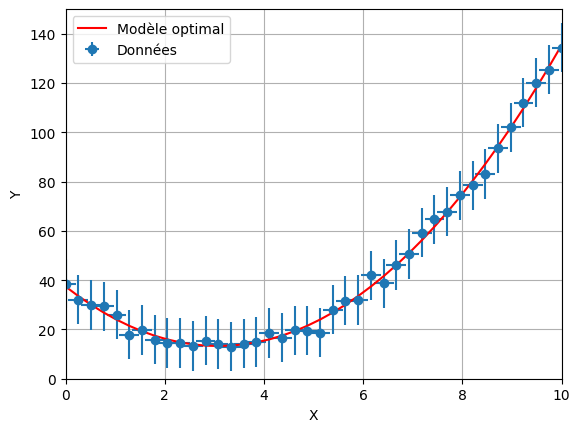

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def modele_polynome_ordre_2(x, a, b, c):
    """
    Modèle : 
        f(x) = ax^2 + bx + c
    variable indépendante: 
        x
    variable dépendante: 
        y = f(x) 
    paramètres: 
        a, b, c 
    """
    return a * x**2 + b * x + c

# -------------------------------------------------------------------------------------------
# Génération d'un ensemble de données factices 
np.random.seed(0)
x_data = np.linspace(0, 10, 40)
y_data = 2.5 * x_data**2 - 15 * x_data + 35 + np.random.normal(scale=2, size=x_data.size)
incertitude_x = 0.2  # Incertitude sur x_data
incertitude_y = 10  # Incertitude sur y_data

# -------------------------------------------------------------------------------------------
# Ajustement du modèle 
popt, pcov = curve_fit(modele_polynome_ordre_2, x_data, y_data)

# Paramètres optimaux obtenus:
a_fit, b_fit, c_fit = popt

# -------------------------------------------------------------------------------------------
# Calcul des incertitudes sur les paramètres optimaux  
# a_uncertainty, b_uncertainty, c_uncertainty = ...

# -------------------------------------------------------------------------------------------
# Calcul du coefficient de détermination
y_pred = modele_polynome_ordre_2(x_data, a_fit, b_fit, c_fit) # Prédiction du modèle
y_mean = np.mean(y_data)
r_squared = 1 - np.sum((y_data - y_pred)**2) / np.sum((y_data - y_mean)**2)

# -------------------------------------------------------------------------------------------
# Affichage des résultats
print(f"Paramètres optimaux:\n a = {a_fit},\n b = {b_fit},\n c = {c_fit}")
# print(f"Incertitude sur les paramètres optimaux: delta_a={a_uncertainty}, delta_b={b_uncertainty}, delta_c={b_uncertainty}")
print(f"Coefficient de détermination:\n R² = {r_squared}")

# Visualisation des données et du modèle
plt.errorbar(x_data, y_data, xerr=incertitude_x, yerr=incertitude_y, fmt='o', label='Données')
plt.plot(x_data, modele_polynome_ordre_2(x_data, a_fit, b_fit, c_fit), color='red', label='Modèle optimal')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 10)  # Remplacez min_x_value et max_x_value par vos valeurs minimale et maximale pour l'axe X
plt.ylim(0, 150) 
plt.legend()
plt.grid(True)
plt.show()

---
## Exemple 3: Modèle d'oscillation amortie

Le modèle d'oscillation amortie est défini par l'équation suivante :

$$ x(t) = A_0 \exp\left(-\frac{\gamma}{2} \cdot t\right) \cos(\omega \cdot t + \phi) $$

- Variables:
  - $t$ : temps (en s)
  - $x$ : position (en m)

- Paramètres:
    - $A_0$ : amplitude initiale (en m)
    - $\omega$ : fréquence angulaire (en rad/s)
    - $\gamma$ : taux d'amortissement (en s$^{-1}$)
    - $\phi$ : phase initiale (en rad)


Paramètres ajustés:
 A = 4.732044520913023,
 omega = 2.0013001957018965,
 gamma = 0.18880695839145517,
 phi = 0.785658536996738


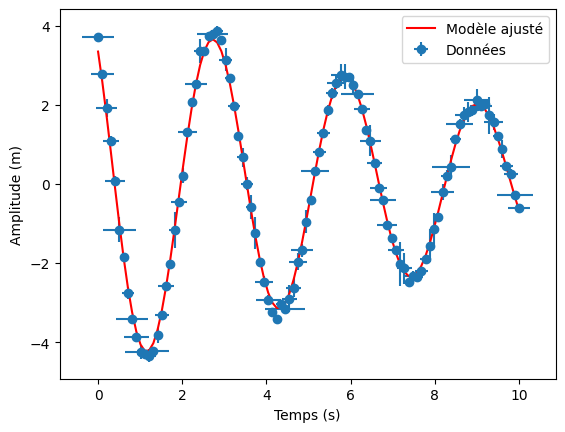

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------------------------------------------------------------------
def modele_oscillation_amortie(t, A_0, omega, gamma, phi):
    """
    Modèle d'oscillation amortie :  x(t) = A_0 * exp(-gamma/2 * t) * cos(omega * t + phi) 
        Variable indépendante:
            t : temps
        Variable dépendante:
            x : position
        Paramètres:
            A_0 : amplitude initiale
            omega : fréquence angulaire
            gamma : taux d'amortissement
            phi : phase initiale
    """
    return A_0 * np.exp(-gamma/2 * t) * np.cos(omega * t + phi)

# -------------------------------------------------------------------------------------------
# Générer des données factices pour l'oscillation amortie
# -------------------------------------------------------------------------------------------
A_0_true = 5.0
omega_true = 2.0
gamma_true = 0.2
phi_true = np.pi / 4
np.random.seed(0)
t_data = np.linspace(0, 10, 100)
y_data = modele_oscillation_amortie(t_data, A_0_true, omega_true, gamma_true, phi_true) + np.random.normal(scale=0.1, size=t_data.size)

# Générer des incertitudes pour les données temporelles
uncertainty_t = np.abs(np.random.normal(scale=.2, size=t_data.size))  # Incertitude de 0.05 unités de temps

# Générer des incertitudes pour les données d'amplitude
uncertainty_y = np.abs(np.random.normal(scale=.2, size=y_data.size))  # Incertitude de 0.1 sur les données d'amplitude


# -------------------------------------------------------------------------------------------
# Réaliser l'ajustement de courbe en tenant compte des incertitudes sur les données d'amplitude et de temps
popt, pcov = curve_fit(modele_oscillation_amortie, t_data, y_data, sigma=uncertainty_y, absolute_sigma=True, p0=[A_0_true, omega_true, gamma_true, phi_true])

# Paramètres ajustés
A_fit, omega_fit, gamma_fit, phi_fit = popt

# Incertitudes sur les paramètres
# A_uncertainty, omega_uncertainty, gamma_uncertainty, phi_uncertainty = ...

# -------------------------------------------------------------------------------------------
# Affichage des résultats
print(f"Paramètres ajustés:\n A = {A_fit},\n omega = {omega_fit},\n gamma = {gamma_fit},\n phi = {phi_fit}")
# print(f"Incertitudes sur les paramètres: A={A_uncertainty}, omega={omega_uncertainty}, gamma={gamma_uncertainty}, phi={phi_uncertainty}")

# -------------------------------------------------------------------------------------------
# Visualisation des données et de l'ajustement
plt.errorbar(t_data, y_data, yerr=uncertainty_y, xerr=uncertainty_t, fmt='o', label='Données')
plt.plot(t_data, modele_oscillation_amortie(t_data, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.show()

## Exemple 4 : Modèle d'amplitude de l'oscillateur entretenu

Le modèle d'amplitude en fonction de la fréquence est défini par l'équation suivante :

$$ A(\omega) = A_e \cdot \frac{\omega_0 / \omega}{\sqrt{\left(\frac{\omega_0}{\omega} - \frac{\omega}{\omega_0}\right)^2 + \frac{1}{Q^2}}} $$

- Variables:
  - $A$ : amplitude de l'oscillateur entretenu (en m)
  - $\omega$ : fréquence d'entretien (en rad/s)
    
- Paramètres
  - $A_e$ : amplitude de l'oscillateur d'entretien (en m)
  - $Q$ : facteur de qualité (sans unité)
  - $\omega_0$ : fréquence propre (en rad/s)


Paramètres ajustés:
 Ae = 1.0353874631017435,
 omega0 = 9.40090635368244,
 Q = 1.9843261251850683


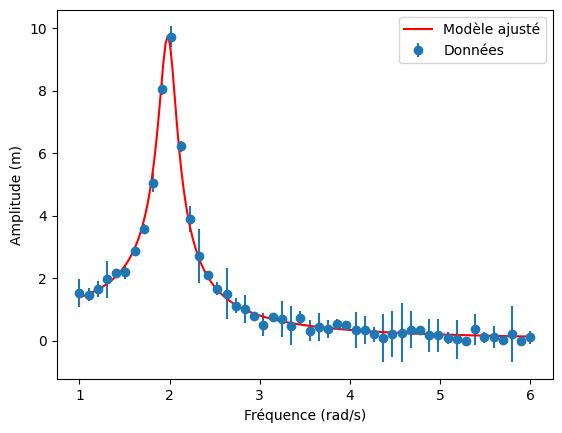

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Afct(omega, Ae, Q, omega0):
    """
    Modèle d'amplitude en fonction de la fréquence :
    Ae : amplitude de l'oscillateur non forcé
    Q : facteur de qualité
    omega0 : fréquence propre
    omega : fréquence d'entretien
    """
    return Ae * (omega0 / omega) / (np.sqrt((omega0 / omega - omega / omega0)**2 + 1 / Q**2))

# Générer des données factices pour l'amplitude en fonction de la fréquence
np.random.seed(0)
omega_data = np.linspace(1, 6, 50)
Ae_true = 1.0
omega0_true = 2.0
Q_true = 10
amplitude_data = Afct(omega_data, Ae_true, Q_true, omega0_true) + np.random.normal(scale=0.1, size=omega_data.size)

# Ajouter des incertitudes sur les données d'amplitude
uncertainty_amplitude = np.abs(np.random.normal(scale=.5, size=omega_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(Afct, omega_data, amplitude_data, sigma=uncertainty_amplitude, absolute_sigma=True, p0=[Ae_true, Q_true, omega0_true])

# Paramètres ajustés
Ae_fit, omega0_fit, Q_fit = popt

# Incertitudes sur les paramètres
# Ae_uncertainty, omega0_uncertainty, Q_uncertainty = ...

# Affichage des résultats
print(f"Paramètres ajustés:\n Ae = {Ae_fit},\n omega0 = {omega0_fit},\n Q = {Q_fit}")
# print(f"Incertitudes sur les paramètres: Ae={Ae_uncertainty}, omega0={omega0_uncertainty}, Q={Q_uncertainty}")


omega_data_fit = np.linspace(1, 6, 200)

# Visualisation des données et de l'ajustement
plt.errorbar(omega_data, amplitude_data, yerr=uncertainty_amplitude, fmt='o', label='Données')
plt.plot(omega_data_fit, Afct(omega_data_fit, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Fréquence (rad/s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.show()

## Exemple 4 : Modèle pour le courant dans la bobine d'induction

L'équation du modèle est :

$$ I(t) = I_0 \cdot e^{-\frac{t}{\tau}}$$

- Variables:
    - $I$ : courant (en A)
    - $t$ : temps (en s)
 
- Paramètres: 
    - $I_0$ : courant initial (en A)
    - $\tau$ : constante de temps du circuit (en s)



Paramètres ajustés:
 I0 = 5.225144999830461,
 tau = 1.7763725532051236


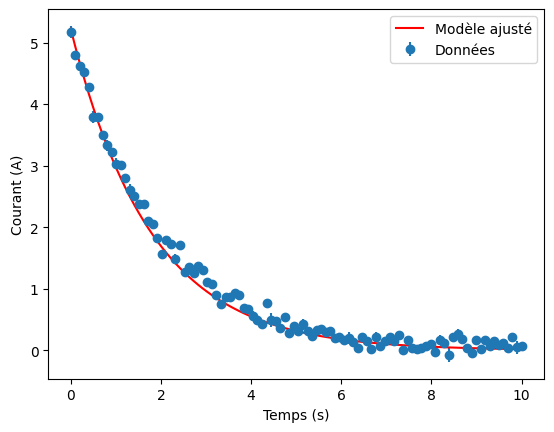

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle pour le courant dans la bobine d'induction
def modele_courant(t, I0, tau):
    """
    Modèle de courant dans la bobine d'induction :
    t : temps
    I0 : courant initial
    tau : constante de temps
    """
    return I0 * np.exp(-t / tau)

# Générer des données factices pour le courant dans la bobine d'induction
np.random.seed(0)
t_data = np.linspace(0, 10, 100)
I0_true = 5.0
tau_true = 2.0
courant_data = modele_courant(t_data, I0_true, tau_true) + np.random.normal(scale=0.1, size=t_data.size)

# Ajouter des incertitudes sur les données de courant
uncertainty_courant = np.abs(np.random.normal(scale=0.05, size=t_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_courant, t_data, courant_data, sigma=uncertainty_courant, p0=[I0_true, tau_true])

# Paramètres ajustés
I0_fit, tau_fit = popt

# Incertitudes sur les paramètres
# I0_uncertainty, tau_uncertainty = ...

# Affichage des résultats
print(f"Paramètres ajustés:\n I0 = {I0_fit},\n tau = {tau_fit}")
# print(f"Incertitudes sur les paramètres: I0={I0_uncertainty}, tau={tau_uncertainty}")

# Visualisation des données et de l'ajustement
plt.errorbar(t_data, courant_data, yerr=uncertainty_courant, fmt='o', label='Données')
plt.plot(t_data, modele_courant(t_data, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Temps (s)')
plt.ylabel('Courant (A)')
plt.legend()
plt.show()

## Exemple 5 : Modèle algébrique 2D

La même méthode peut s'appliquer à n'importe quelle dimension.

Paramètres ajustés:
 a = 1.989359507179269,
 b = -1.008288661480406,
 c = 0.4872254727213828,
 d = 1.1063446975607507,
 e = -1.8911452722957856,
 f = 2.765278185963029


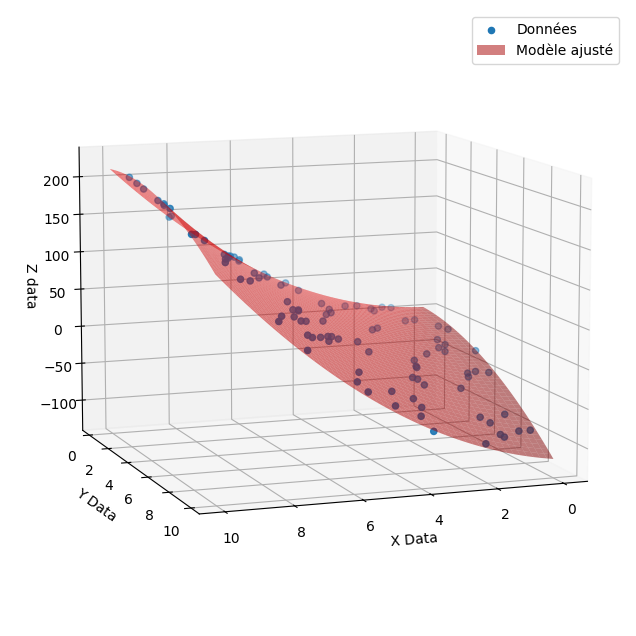

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle d'apprentissage machine
def modele_M(xy, a, b, c, d, e, f):
    """
    Modèle d'apprentissage machine dépendant de deux variables (x, y):
    xy : tuple contenant les variables x et y
    a, b, c, d, e, f : paramètres du modèle
    """
    x, y = xy
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f

# Générer des données factices pour x et y
np.random.seed(0)
x_data = np.random.uniform(0, 10, 100)
y_data = np.random.uniform(0, 10, 100)

# Générer des données factices pour le modèle
a_true = 2.0
b_true = -1.0
c_true = 0.5
d_true = 1.0
e_true = -2.0
f_true = 3.0
modele_data = modele_M((x_data, y_data), a_true, b_true, c_true, d_true, e_true, f_true) + np.random.normal(scale=1.0, size=x_data.size)

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_M, (x_data, y_data), modele_data)

# Paramètres ajustés
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit = popt

# Affichage des résultats
print(f"Paramètres ajustés:\n a = {a_fit},\n b = {b_fit},\n c = {c_fit},\n d = {d_fit},\n e = {e_fit},\n f = {f_fit}")

# Visualisation des données et de l'ajustement
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, modele_data, label='Données')
x_fit, y_fit = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
modele_fit = modele_M((x_fit, y_fit), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)
ax.plot_surface(x_fit, y_fit, modele_fit, color='r', alpha=0.5, label='Modèle ajusté')
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_zlabel('Z data')
ax.view_init(elev=10, azim=70)  
plt.legend()
plt.show()